Step 1: Import Libraries and Extract Historical Financial Data using YFinance

1: Import the required libraries:

In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mplfinance as mpf

2: Fetch the data:

In [2]:
# Define the ticker symbols
tickers = ['TSLA', 'BND', 'SPY']

# Set the date range
start_date = '2015-01-01'
end_date = '2025-01-31'

# Fetch the data
data = yf.download(tickers, start=start_date, end=end_date)

# Display the first few rows of the data
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573147  172.592880  14.620667  62.603431  173.811114   
2015-01-05  62.754826  169.475906  14.006000  62.777537  171.702310   
2015-01-06  62.936531  167.879639  14.085333  63.125802  170.316081   
2015-01-07  62.974373  169.971619  14.063333  63.050080  170.316085   
2015-01-08  62.876019  172.987778  14.041333  62.921442  173.206226   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.399015  171.542687  14.217333  62.406587   
2015-01-05  14.433333  62.610977  169.165053  13.810667  62.641262   
2015-01-06  14.280000  62.860824  167.073085  13.614000  62.860824   
2015-01-07  14.318667  62.875954  168.770204  13.985333  62.944089   
2015-01-08  14.253333  62.815450  171.383093  14.000667  62.921442   

Price                               Volume                       
Ticker             SPY       TSLA      BND        SPY      TSLA  
Date                                                             
2015-01-02  173.391037  14.858000  2218800  121465900  71466000  
2015-01-05  171.534282  14.303333  5820100  169632600  80527500  
2015-01-06  169.786780  14.004000  3887600  209151400  93928500  
2015-01-07  169.223882  14.223333  2433400  125346700  44526000  
2015-01-08  171.399886  14.187333  1873400  147217800  51637500

Step 2: Data Cleaning and Understanding

Clean the data and understand its basic statistics.

1: Check for missing values:

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64


2: Check for duplicate rows:

In [5]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


3: Check for white spaces:

In [6]:
# Check for white spaces in column names
print("Column names before stripping white spaces:")
print(data.columns)

Column names before stripping white spaces:
MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [7]:
# Check for white spaces in data
white_spaces = data.apply(lambda x: x.str.contains(' ', na=False) if x.dtype == "object" else False).sum()
print("White spaces in data columns:")
print(white_spaces)

White spaces in data columns:
0


4: Checking dataset size

In [8]:
# Check the size of the dataset
dataset_size = data.shape
print(f"Dataset size: {dataset_size}")

Dataset size: (2535, 15)


5: Check data types of each column

In [9]:
# Check data types of each column
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
Price   Ticker
Close   BND       float64
        SPY       float64
        TSLA      float64
High    BND       float64
        SPY       float64
        TSLA      float64
Low     BND       float64
        SPY       float64
        TSLA      float64
Open    BND       float64
        SPY       float64
        TSLA      float64
Volume  BND         int64
        SPY         int64
        TSLA        int64
dtype: object


6: Basic statistics

In [10]:
# Display basic statistics
data.describe()

Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean      69.289451   316.067402   117.848209    69.391261   317.725661   
std        4.792146   117.926909   116.508288     4.800409   118.486410   
min       61.860870   156.800797     9.578000    61.937357   157.864090   
25%       65.565239   214.841942    17.228000    65.630173   215.702222   
50%       68.329109   277.117920    30.298000    68.457884   277.919519   
75%       72.879929   405.869217   221.525002    72.946418   409.134341   
max       78.823303   609.750000   479.859985    78.920180   610.780029   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     120.474827    69.186012   314.157889   115.097514    69.293225   
std      119.236025     4.782142   117.269902   113.698930     4.793200   
min       10.331333    61.822631   154.676868     9.403333    61.891465   
25%       17.527667    65.475490   214.206915    16.942000    65.552713   
50%       32.329334    68.169747   276.073612    29.760000    68.310219   
75%      226.696671    72.728786   402.830858   217.061661    72.845697   
max      488.540009    78.788066   606.799988   457.510010    78.884950   

Price                                   Volume                              
Ticker          SPY         TSLA           BND           SPY          TSLA  
count   2535.000000  2535.000000  2.535000e+03  2.535000e+03  2.535000e+03  
mean     316.021385   117.877662  4.233200e+06  8.714655e+07  1.120308e+08  
std      117.921618   116.611575  2.796083e+06  4.487253e+07  7.387509e+07  
min      156.354898     9.488000  0.000000e+00  2.027000e+07  1.062000e+07  
25%      214.972485    17.259334  2.057700e+06  5.862005e+07  6.680295e+07  
50%      277.230750    31.299999  3.805800e+06  7.642870e+07  9.264180e+07  
75%      406.100256   222.653336  5.626700e+06  1.018866e+08  1.294283e+08  
max      609.809998   475.899994  3.193720e+07  5.072443e+08  9.140820e+08

Step 3: Exploratory Data Analysis (EDA)

Visualize the data to identify trends and patterns.

1: Visualize closing prices over time:

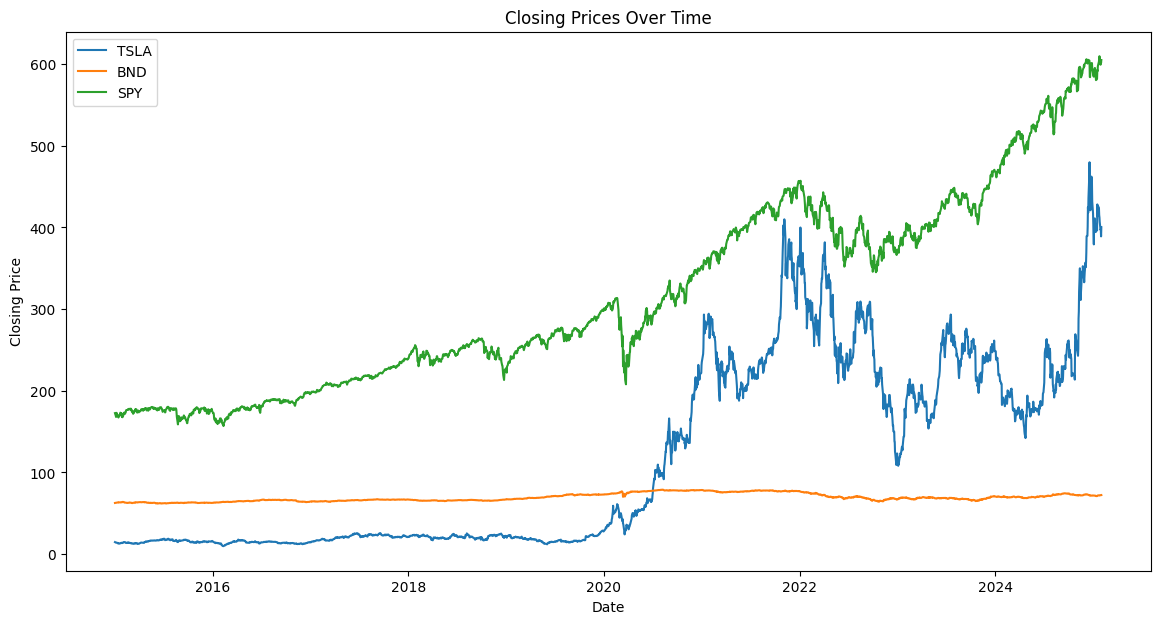

In [12]:
# Plot closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data['Close'][ticker], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

2: Calculate and plot the daily percentage change to observe volatility:

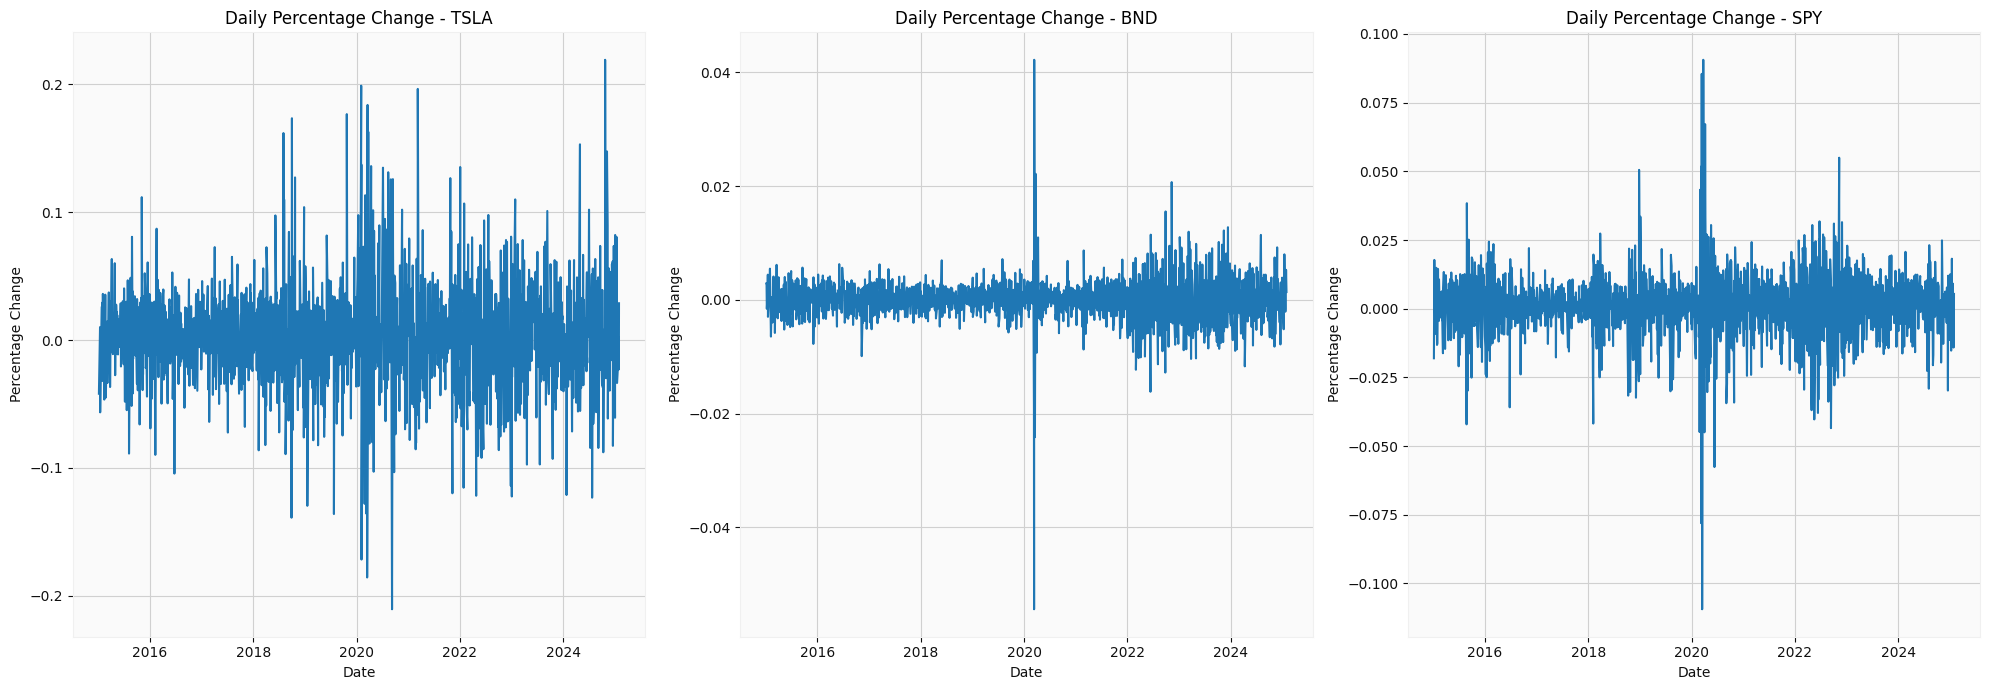

In [59]:
# Calculate daily percentage change
daily_pct_change = data['Close'].pct_change()

# Plot daily percentage change side by side for each ticker
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

for i, ticker in enumerate(tickers):
    sns.lineplot(data=daily_pct_change[ticker], ax=axes[i])
    axes[i].set_title(f'Daily Percentage Change - {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Percentage Change')

plt.tight_layout()
plt.show()

3: Analyze volatility by calculating rolling means and standard deviations to understand short-term trends and fluctuations:

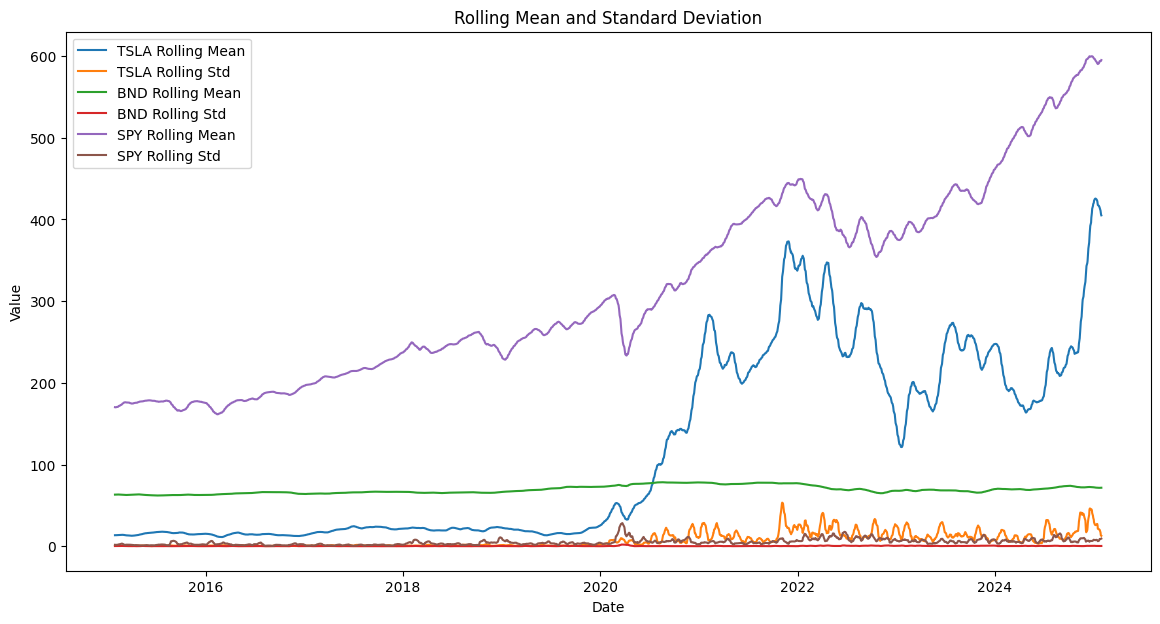

In [14]:
# Calculate rolling mean and standard deviation
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_mean[ticker], label=f'{ticker} Rolling Mean')
    plt.plot(rolling_std[ticker], label=f'{ticker} Rolling Std')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

4: Perform outlier detection to identify significant anomalies:

Calculate IQR and identify outliers for daily percentage change

TSLA - Number of outliers in daily percentage change: 149
BND - Number of outliers in daily percentage change: 114
SPY - Number of outliers in daily percentage change: 167


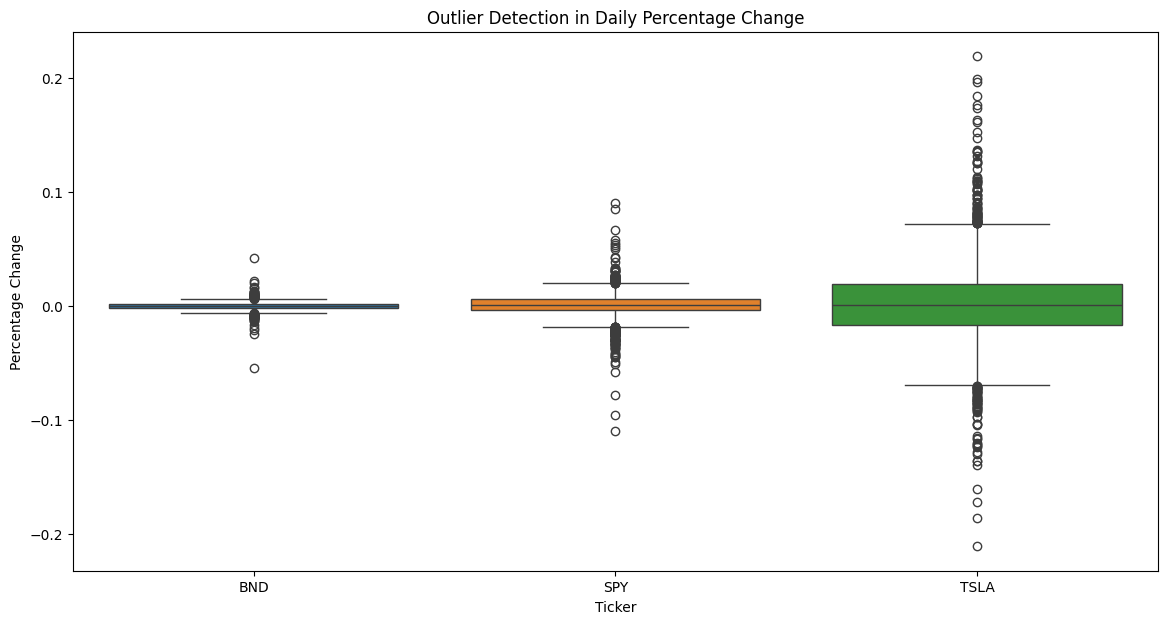

In [25]:
# Calculate IQR and identify outliers for daily percentage change
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    return outliers

# Calculate and print the number of outliers for daily percentage change
for ticker in tickers:
    outliers = calculate_outliers(daily_pct_change[ticker])
    print(f"{ticker} - Number of outliers in daily percentage change: {outliers.shape[0]}")

# Plot boxplot to detect outliers in daily percentage change
plt.figure(figsize=(14, 7))
sns.boxplot(data=daily_pct_change)
plt.title('Outlier Detection in Daily Percentage Change')
plt.ylabel('Percentage Change')
plt.show()

calculate and print the number of outliers using IQR

In [22]:
# Function to calculate and print the number of outliers using IQR
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    return outliers

# Calculate and print the number of outliers for all columns for each ticker
for ticker in tickers:
    print(f"Outlier analysis for {ticker}:")
    for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
        outliers = calculate_outliers(data[column][ticker])
        print(f"{column} - Number of outliers: {outliers.shape[0]}")

        # Optionally, print the outlier values
        # print(outliers)

Outlier analysis for TSLA:
Open - Number of outliers: 0
High - Number of outliers: 0
Low - Number of outliers: 0
Close - Number of outliers: 0
Volume - Number of outliers: 183
Outlier analysis for BND:
Open - Number of outliers: 0
High - Number of outliers: 0
Low - Number of outliers: 0
Close - Number of outliers: 0
Volume - Number of outliers: 51
Outlier analysis for SPY:
Open - Number of outliers: 0
High - Number of outliers: 0
Low - Number of outliers: 0
Close - Number of outliers: 0
Volume - Number of outliers: 133


Visualize Outliers in Volume Data

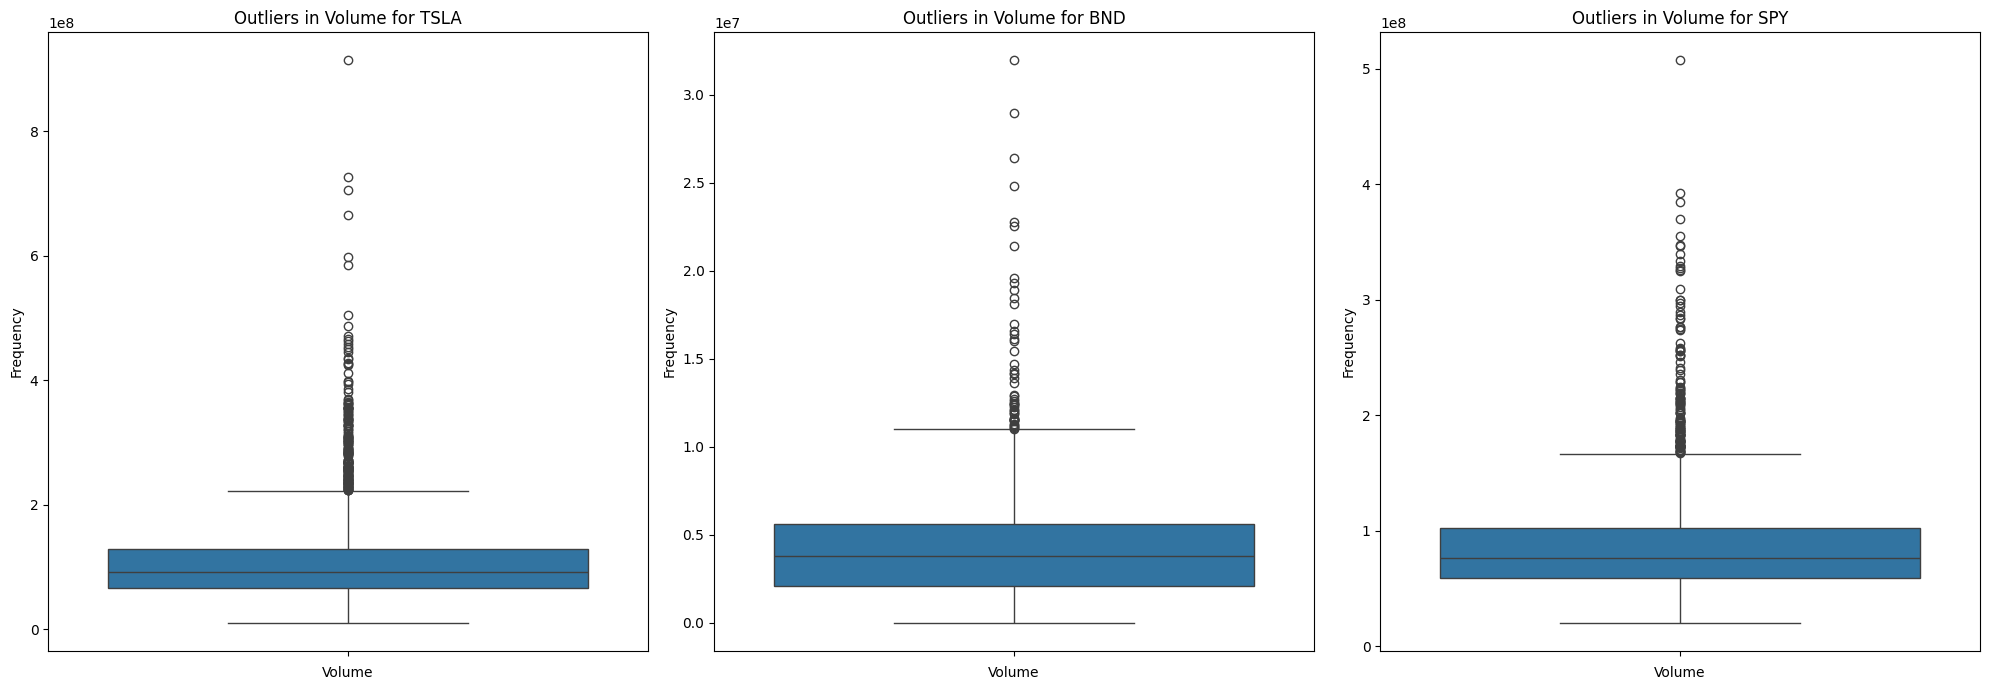

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

for i, ticker in enumerate(tickers):
    sns.boxplot(data['Volume'][ticker], ax=axes[i])
    axes[i].set_title(f'Outliers in Volume for {ticker}')
    axes[i].set_xlabel('Volume')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

5: Plotting distribution:

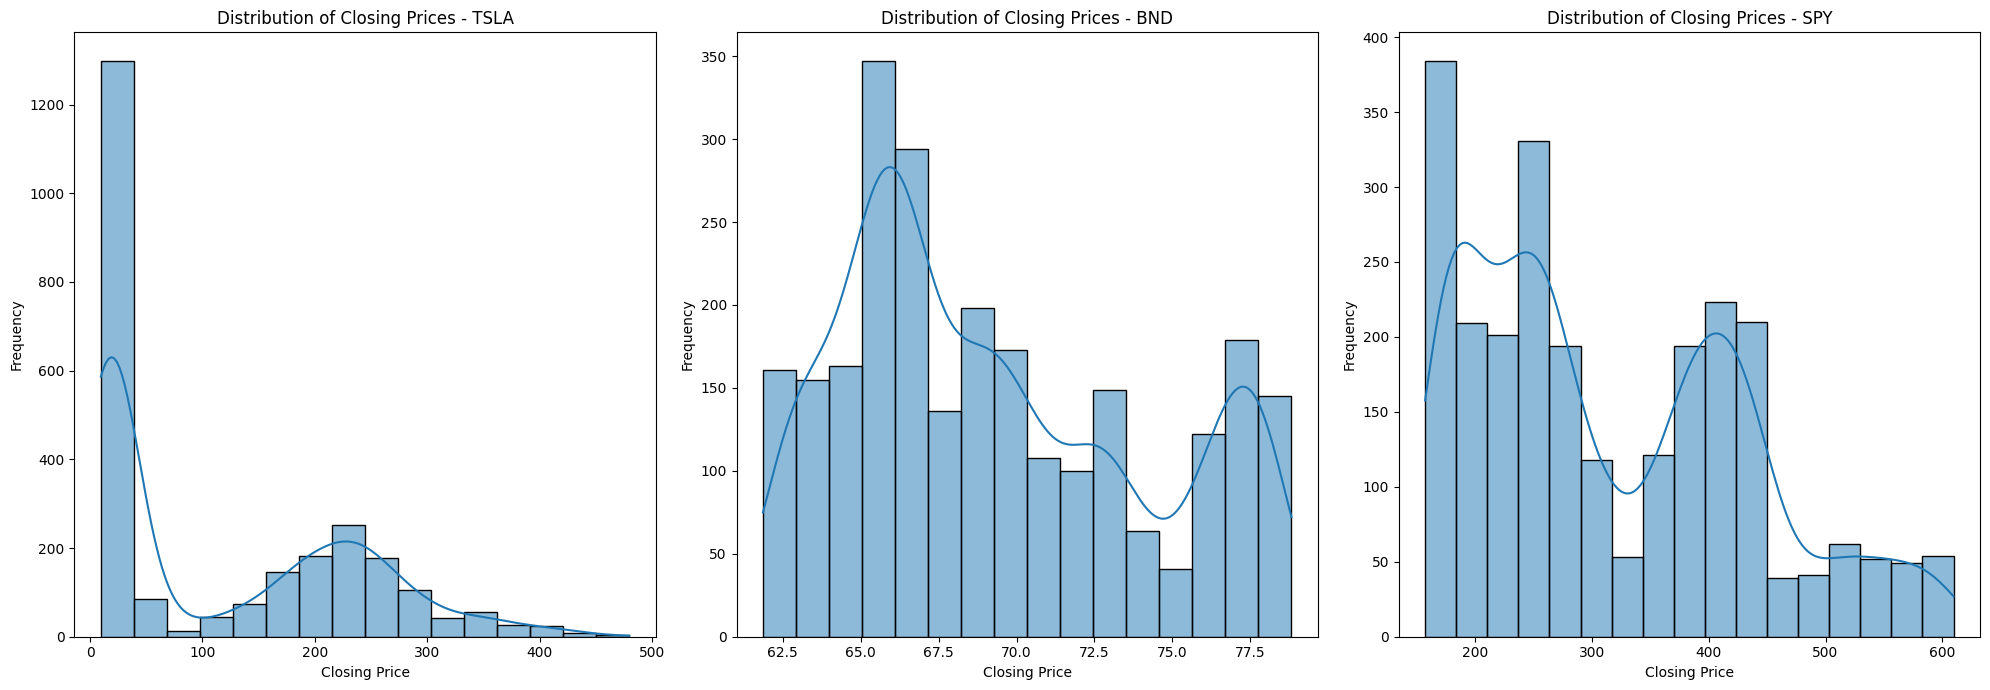

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

for i, ticker in enumerate(tickers):
    sns.histplot(data['Close'][ticker], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Closing Prices - {ticker}')
    axes[i].set_xlabel('Closing Price')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

6: Analyze days with unusually high or low returns:

In [28]:
# Identify days with unusually high or low returns
high_returns = daily_pct_change[daily_pct_change > daily_pct_change.quantile(0.95)]
low_returns = daily_pct_change[daily_pct_change < daily_pct_change.quantile(0.05)]
print("Days with unusually high returns:")
print(high_returns.dropna())
print("\nDays with unusually low returns:")
print(low_returns.dropna())

Days with unusually high returns:
Ticker           BND       SPY      TSLA
Date                                    
2022-11-10  0.020702  0.054954  0.073934
2022-11-30  0.007756  0.031501  0.076702
2023-11-02  0.005798  0.019164  0.062482
2023-11-14  0.012202  0.019401  0.061240
2025-01-15  0.008003  0.018190  0.080382

Days with unusually low returns:
Ticker           BND       SPY      TSLA
Date                                    
2020-03-12 -0.054385 -0.095677 -0.116172
2020-03-18 -0.024139 -0.050633 -0.160344
2021-02-25 -0.008726 -0.024096 -0.080591
2022-02-23 -0.005031 -0.017739 -0.069979
2022-05-05 -0.009957 -0.035543 -0.083286
2022-06-13 -0.016152 -0.037968 -0.071022
2022-09-29 -0.005148 -0.020889 -0.068101
2022-10-07 -0.005189 -0.027894 -0.063243
2022-10-14 -0.004825 -0.022789 -0.075456
2022-12-05 -0.007891 -0.017989 -0.063687
2023-02-21 -0.008685 -0.020061 -0.052518
2024-12-18 -0.007834 -0.029803 -0.082795


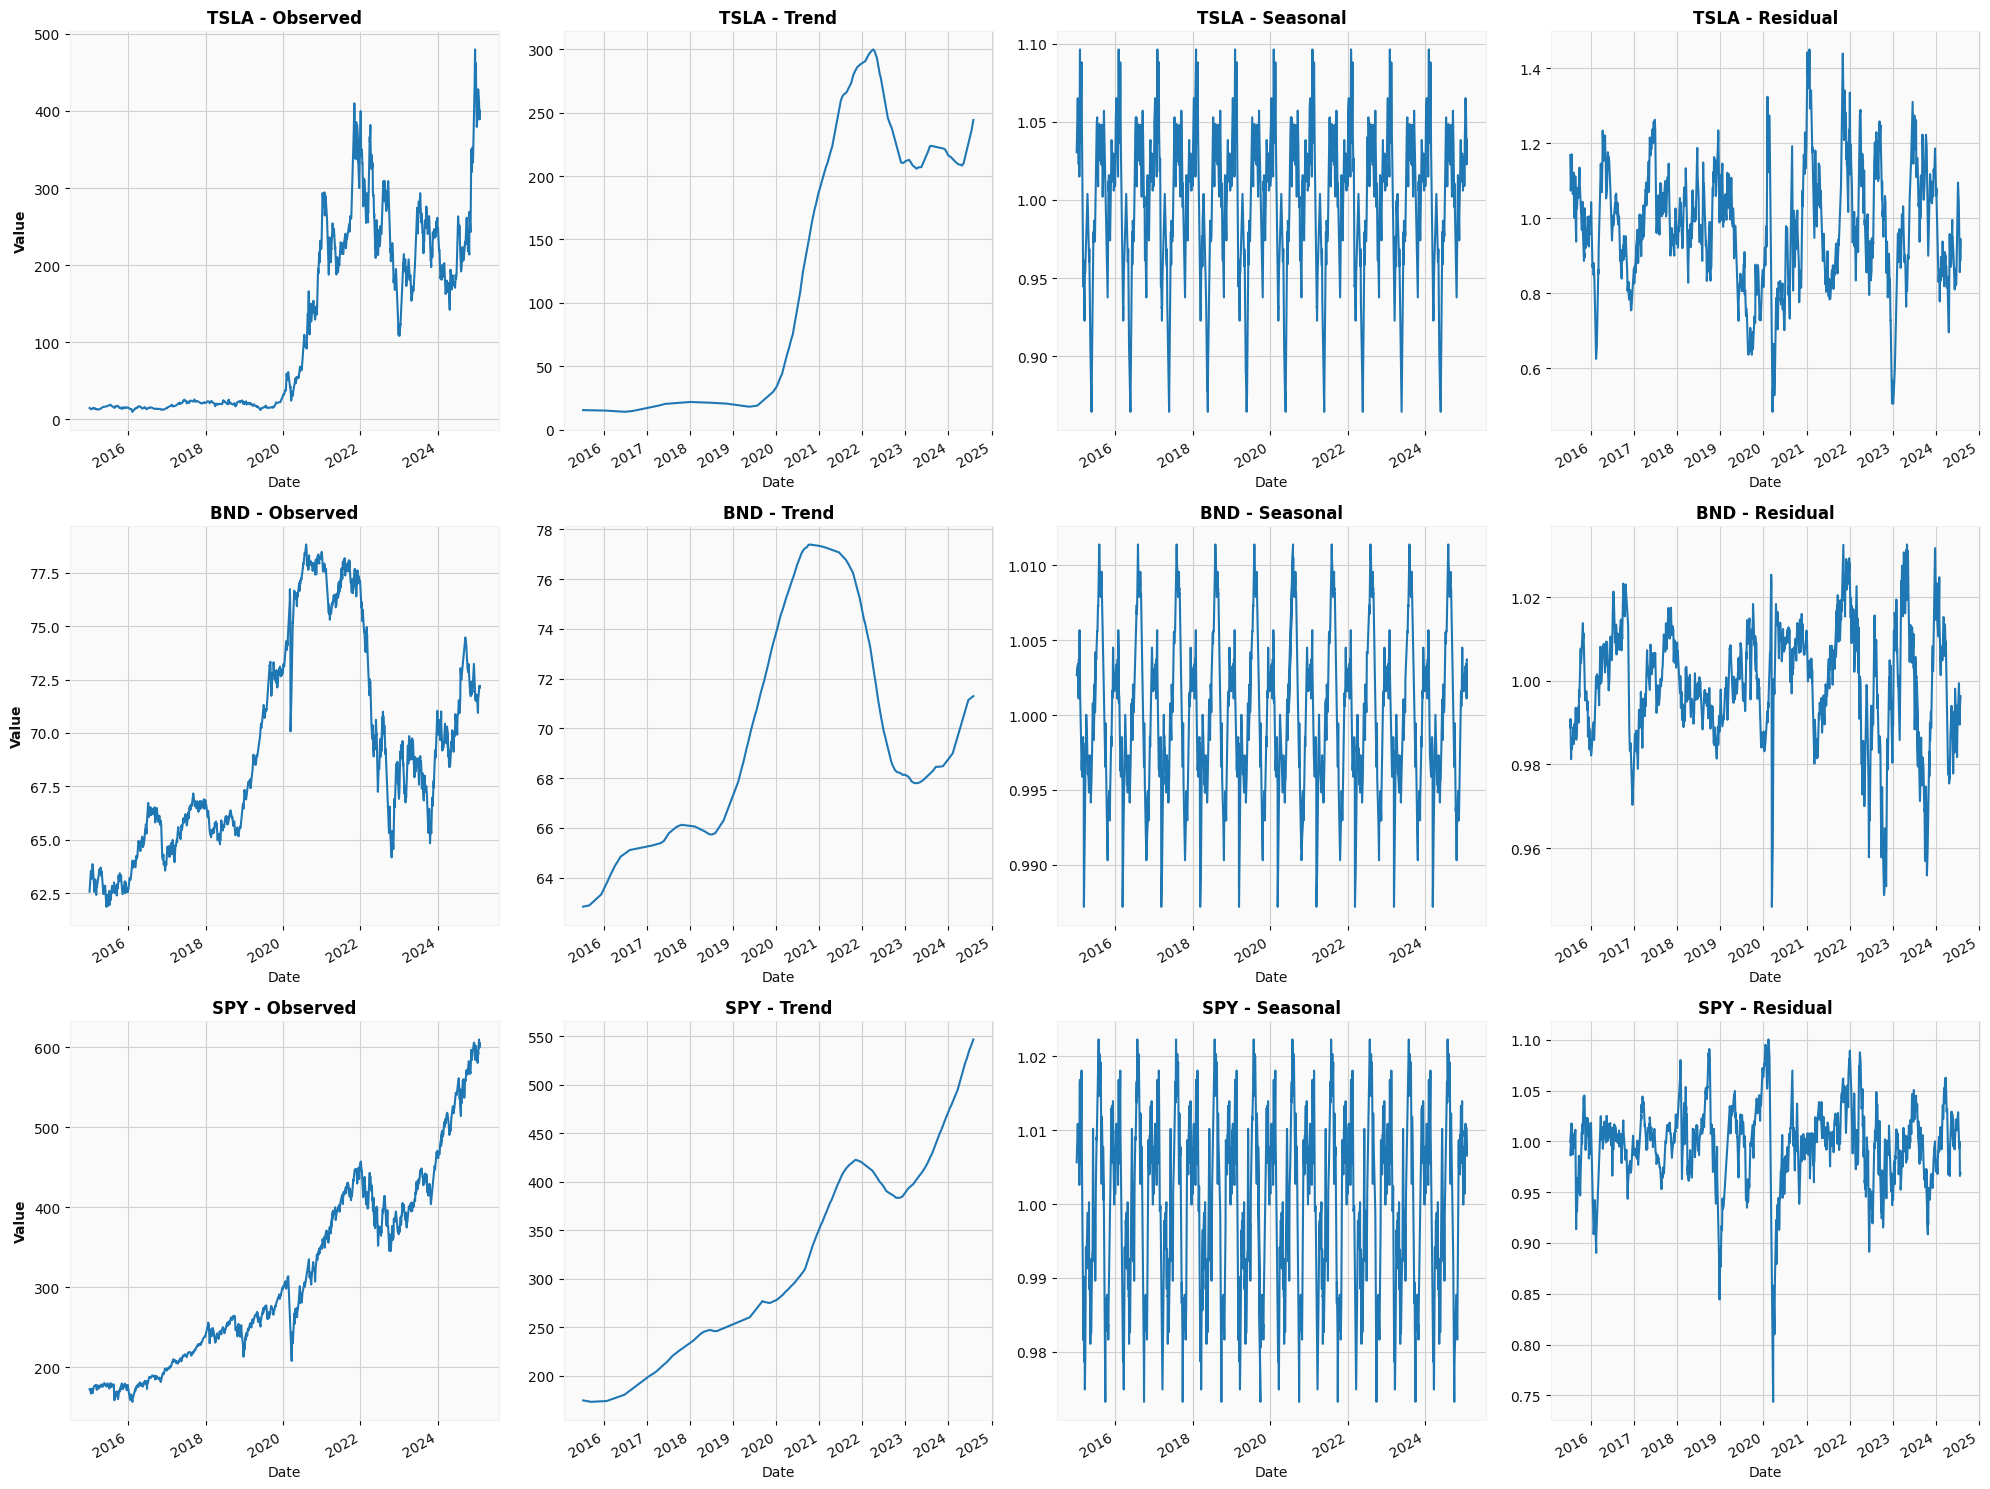

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a single figure with subplots for each ticker
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Decompose the time series for each ticker and plot in a single figure
for i, ticker in enumerate(tickers):
    result = seasonal_decompose(data['Close'][ticker], model='multiplicative', period=252) # Assuming 252 trading days in a year
    
    result.observed.plot(ax=axes[i, 0], legend=False)
    axes[i, 0].set_title(f'{ticker} - Observed', fontsize=12, fontweight='bold')
    axes[i, 0].set_ylabel('Value', fontsize=10, fontweight='bold')
    
    result.trend.plot(ax=axes[i, 1], legend=False)
    axes[i, 1].set_title(f'{ticker} - Trend', fontsize=12, fontweight='bold')
    
    result.seasonal.plot(ax=axes[i, 2], legend=False)
    axes[i, 2].set_title(f'{ticker} - Seasonal', fontsize=12, fontweight='bold')
    
    result.resid.plot(ax=axes[i, 3], legend=False)
    axes[i, 3].set_title(f'{ticker} - Residual', fontsize=12, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

8: Correlation Analysis:

Calculate the correlation matrix to understand the relationship between different variables.

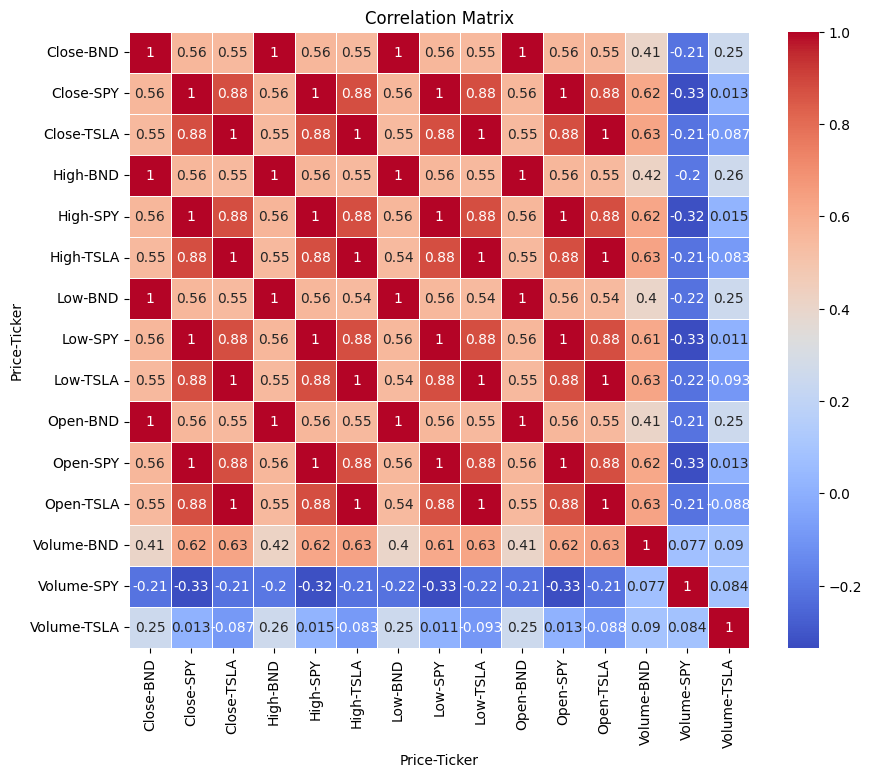

In [35]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

9: Moving Average Convergence Divergence (MACD):

Plot MACD to identify trends and potential buy/sell signals.

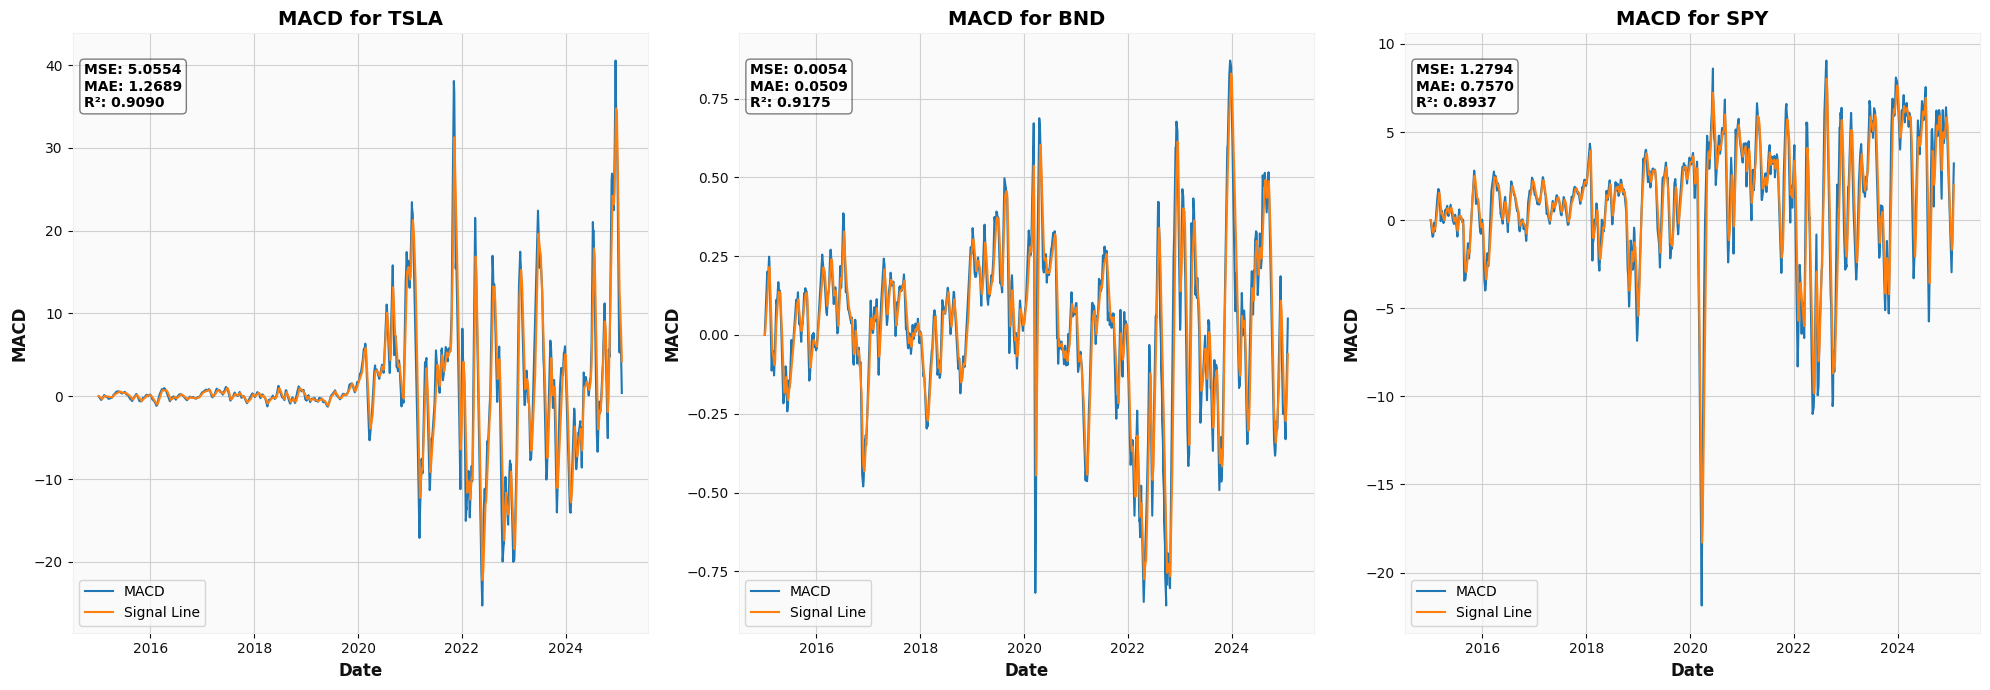

In [64]:
# Function to calculate MACD, Signal Line, and fit metrics
def calculate_macd_fit(price, slow=26, fast=12, signal=9):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span=signal, adjust=False).mean()

    mse = mean_squared_error(macd, signal_line)
    mae = mean_absolute_error(macd, signal_line)
    r2 = r2_score(macd, signal_line)

    return macd, signal_line, mse, mae, r2

# Create a single figure with subplots for each ticker
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

# Calculate and plot MACD, Signal Line, and fit metrics for each ticker
for i, ticker in enumerate(tickers):
    macd, signal_line, mse, mae, r2 = calculate_macd_fit(data['Close'][ticker])
    
    axes[i].plot(data.index, macd, label='MACD')
    axes[i].plot(data.index, signal_line, label='Signal Line')
    axes[i].set_title(f'MACD for {ticker}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Date', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('MACD', fontsize=12, fontweight='bold')
    axes[i].legend(fontsize=10, frameon=True)

    # Display fit metrics on the graph
    axes[i].text(0.02, 0.95, f"MSE: {mse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}", transform=axes[i].transAxes, 
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5), fontsize=10, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

10: Bollinger Bands:

Plot Bollinger Bands to analyze price volatility and identify potential buy/sell signals.

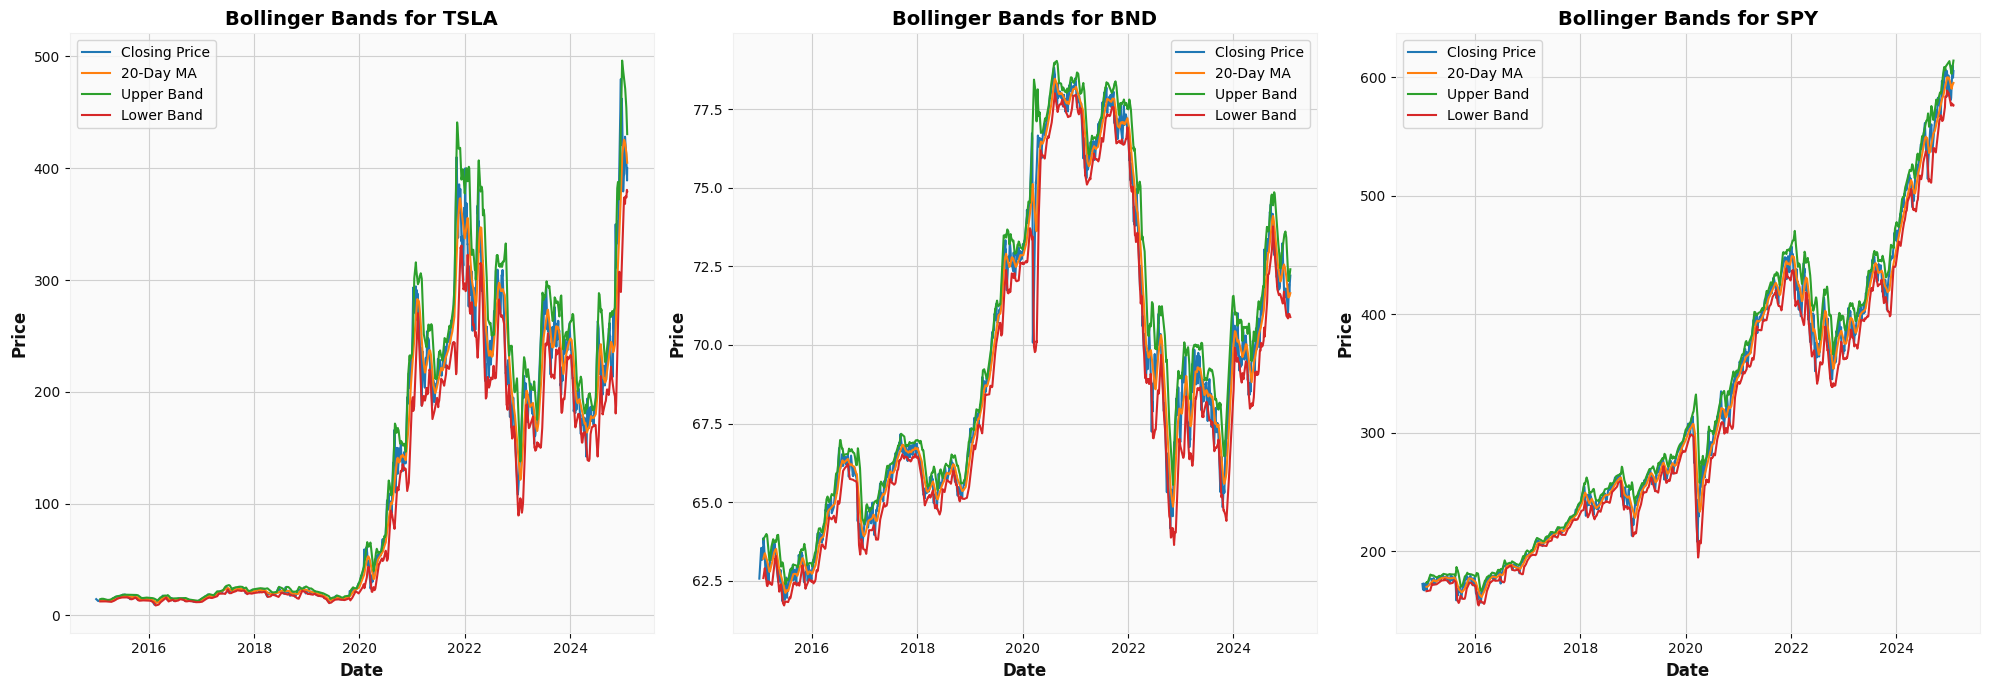

In [65]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(price, window=20, num_std=2):
    rolling_mean = price.rolling(window).mean()
    rolling_std = price.rolling(window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return rolling_mean, upper_band, lower_band

# Create a single figure with subplots for each ticker
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

# Calculate and plot Bollinger Bands for each ticker
for i, ticker in enumerate(tickers):
    rolling_mean, upper_band, lower_band = calculate_bollinger_bands(data['Close'][ticker])
    
    axes[i].plot(data.index, data['Close'][ticker], label='Closing Price')
    axes[i].plot(data.index, rolling_mean, label='20-Day MA')
    axes[i].plot(data.index, upper_band, label='Upper Band')
    axes[i].plot(data.index, lower_band, label='Lower Band')
    axes[i].set_title(f'Bollinger Bands for {ticker}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Date', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Price', fontsize=12, fontweight='bold')
    axes[i].legend(fontsize=10, frameon=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

11: Autocorrelation and Partial Autocorrelation:

Plot autocorrelation and partial autocorrelation to identify the relationship between current and past values.

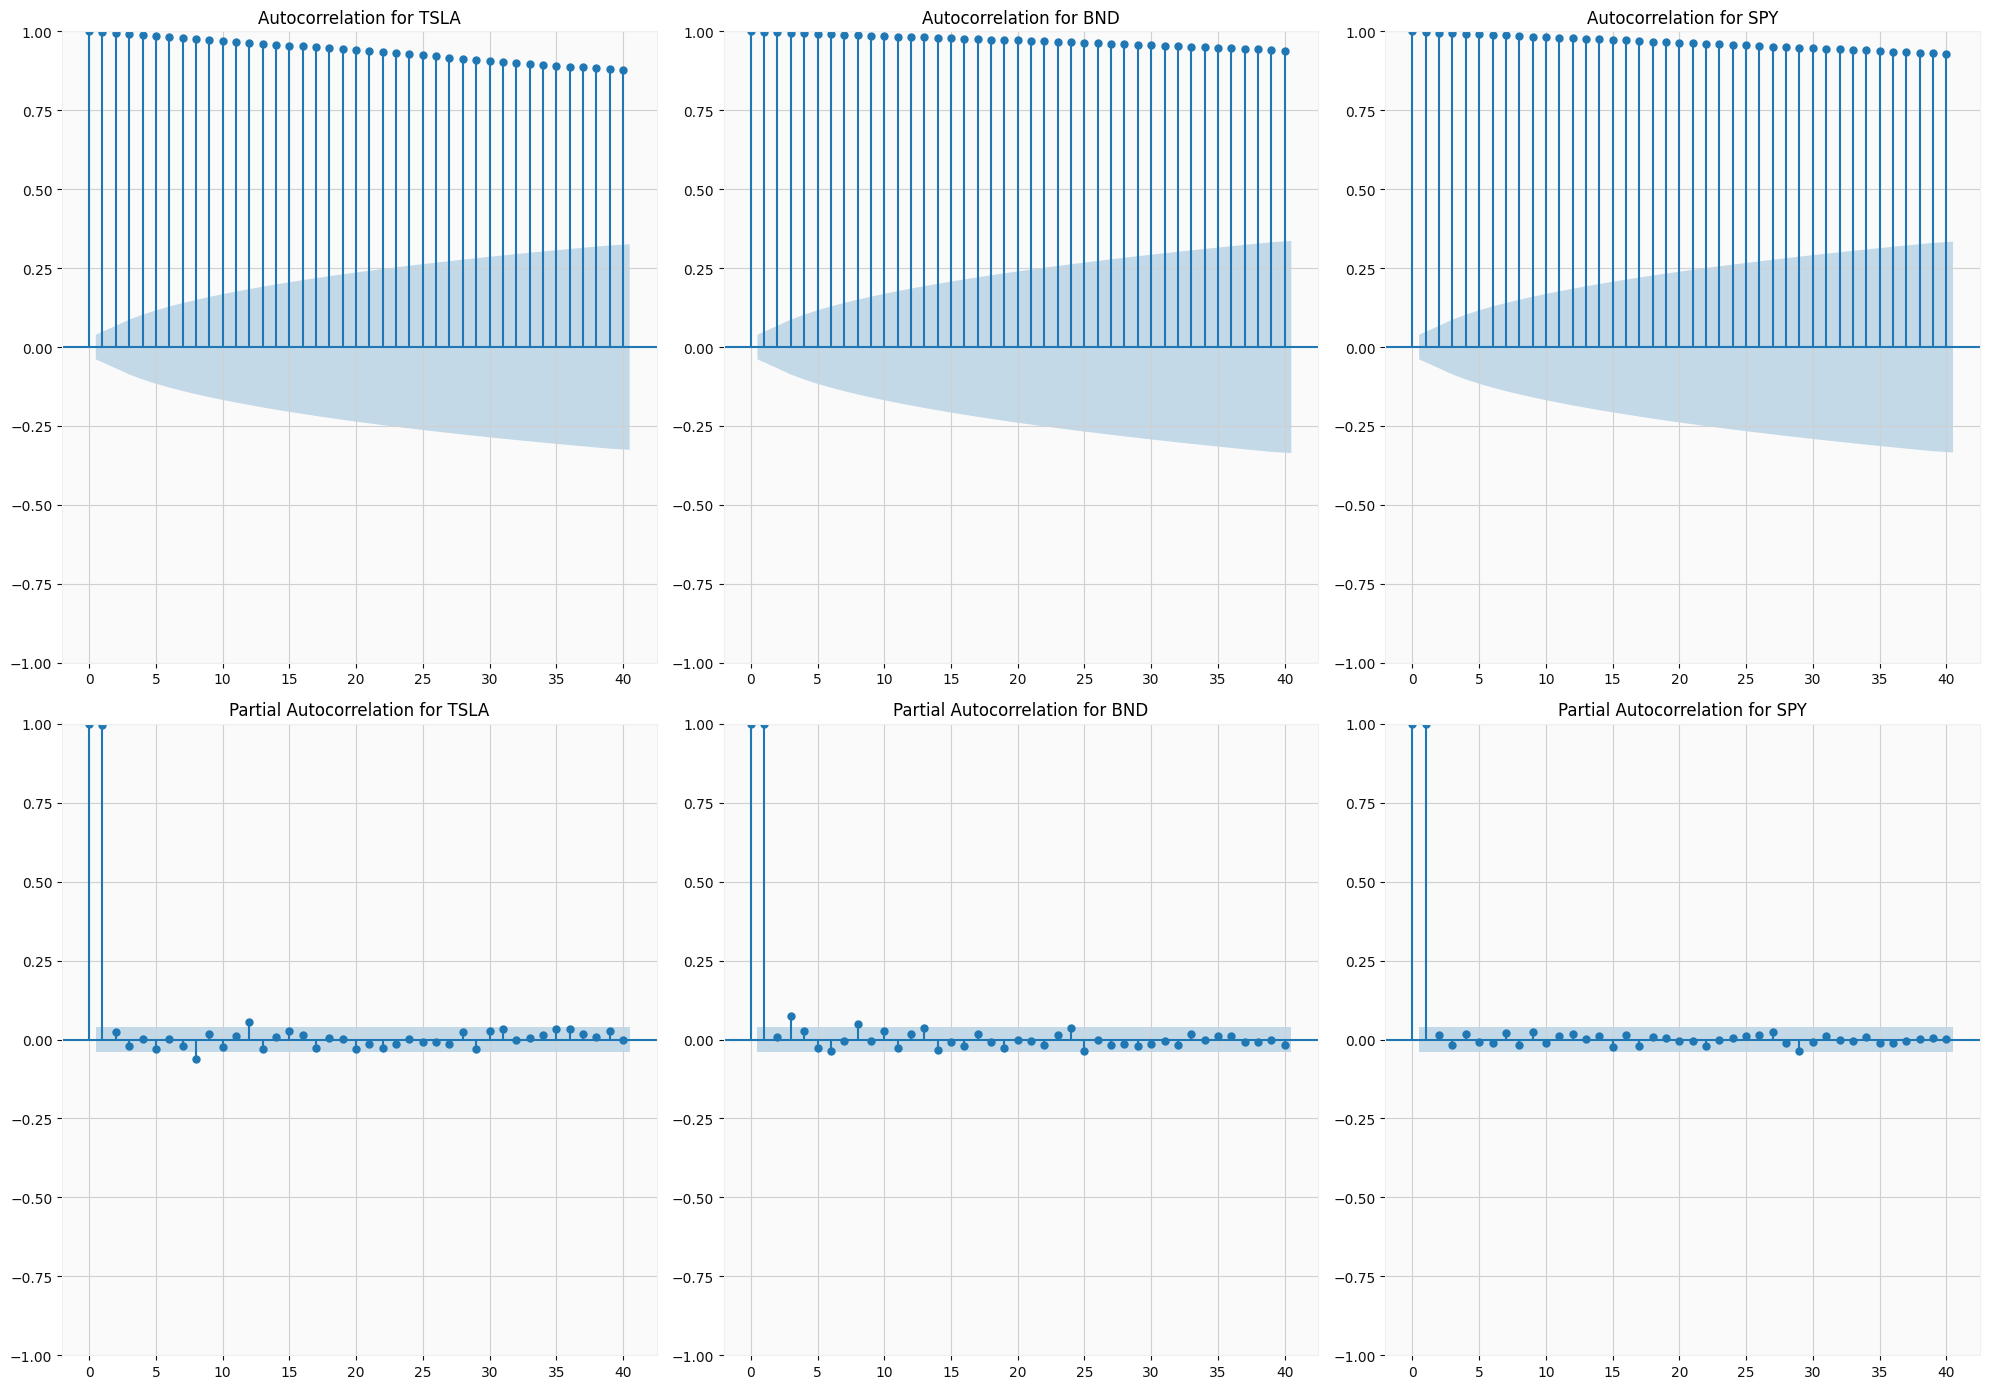

In [63]:
# Create a single figure with subplots for each ticker
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))

# Plot ACF and PACF for each ticker
for i, ticker in enumerate(tickers):
    # Plot ACF
    plot_acf(data['Close'][ticker].dropna(), lags=40, ax=axes[0, i])
    axes[0, i].set_title(f'Autocorrelation for {ticker}')

    # Plot PACF
    plot_pacf(data['Close'][ticker].dropna(), lags=40, ax=axes[1, i])
    axes[1, i].set_title(f'Partial Autocorrelation for {ticker}')

plt.tight_layout()
plt.show()

12: Candlestick Chart:

Plot candlestick chart to visualize price movements over time.

e:\OnlineClass\AIM\Time_Series_Forecasting_Model_for_Portfolio_Management\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




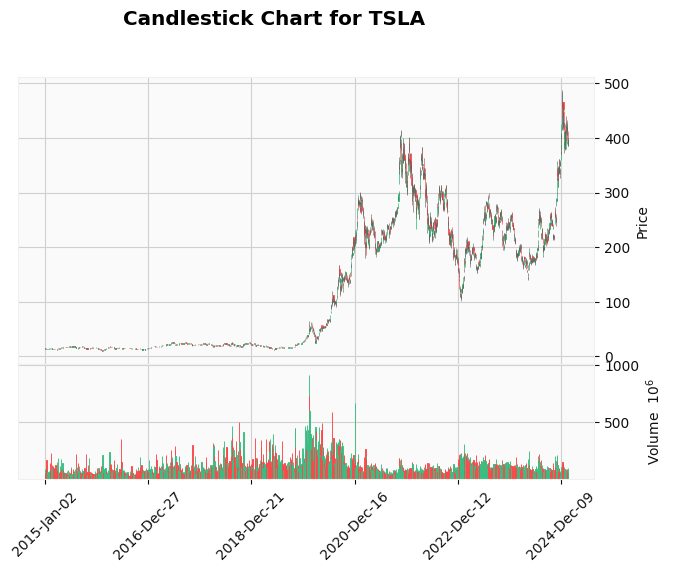

e:\OnlineClass\AIM\Time_Series_Forecasting_Model_for_Portfolio_Management\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




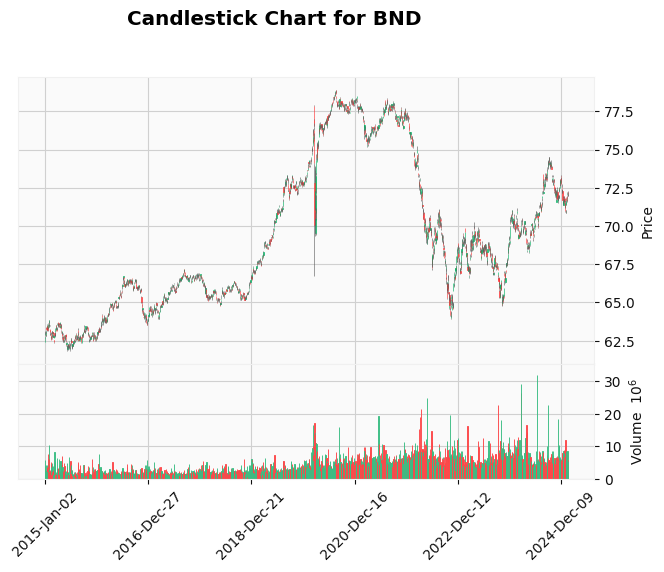

e:\OnlineClass\AIM\Time_Series_Forecasting_Model_for_Portfolio_Management\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




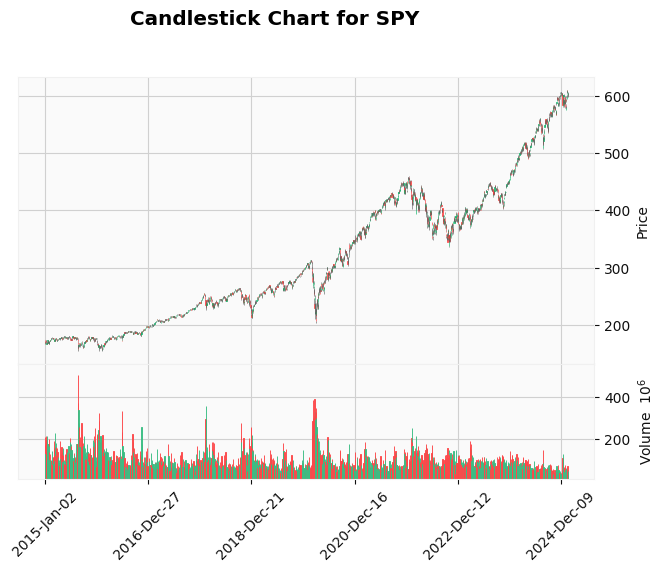

In [56]:
# Convert data to appropriate format for mplfinance
for ticker in tickers:
    df = data['Close'][ticker].to_frame().join(
        data['Open'][ticker], rsuffix='_Open').join(
        data['High'][ticker], rsuffix='_High').join(
        data['Low'][ticker], rsuffix='_Low').join(
        data['Volume'][ticker], rsuffix='_Volume')

    df.columns = ['Close', 'Open', 'High', 'Low', 'Volume']
    df.index.name = 'Date'

    # Plot candlestick chart
    mpf.plot(df, type='candle', volume=True, title=f'Candlestick Chart for {ticker}', style='yahoo')

8: Save data to CSV

In [34]:
# Save cleaned data to CSV
data.to_csv('../src/data/cleaned_data.csv')
print("Cleaned data saved to '../src/data/cleaned_data.csv'")

Cleaned data saved to '../src/data/cleaned_data.csv'


9: key insights:

Overall direction of Tesla’s stock price.

Fluctuations in daily returns and their impact.

Value at Risk (VaR) and Sharpe Ratio to assess potential losses and risk-adjusted returns.